PROJETO 2 C.DADOS - Fernando Jun, Luca Krausz, Luiz Miguel e Vinicius Grecco.
O objetivo deste projeto é prever a média de matemática de uma escola no ENEM com base em 5 features, para isso, seguimos as seguintes etapas abaixo, e exemplificamos com um cenário hipotético de um fundo de investimentos da Faria Lima, melhor explicado mais abaxo:

In [1]:
%matplotlib inline
import os
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
from random import shuffle
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.model_selection import *
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Para ter melhor print
from IPython.display import display

# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')

print(os.getcwd())

# Carregando os dados do arquivo
dados = pd.read_excel('MICRODADOS_ENEM_ESCOLA_2.xlsx', sheet_name = 'MICRODADOS_ENEM_ESCOLA')

# Comando pra ele mostrar todas as colunas e printando tabela
pd.set_option('display.max_columns', None)

Esperamos trabalhar no diretório
/Users/viniciusgrecco/Desktop/INSPER/2SEM/C.DADOS/Projeto-2---Cdados-Modelo-Preditivo/Projeto 2


Target = "NU_MEDIA_MT"

Feautures:\
"TP_DEPENDENCIA_ADM_ESCOLA"\
"NU_TAXA_PARTICIPACAO"\
"NU_TAXA_ABANDONO"\
"NU_TAXA_APROVACAO"\
"PORTE_ESCOLA"

In [3]:
dados.head(10)

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,NaN,171,NaN,NaN,NaN,NaN,NaN,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos
5,2008,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,33,NaN,13,NaN,NaN,NaN,NaN,NaN,59.81,42.49,NaN,NaN,NaN,NaN,79.1,17.9,3.0,De 31 a 60 alunos
6,2005,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,25,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.44,NaN,NaN,NaN,69.3,25.0,5.7,De 1 a 30 alunos
7,2005,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,87,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.46,NaN,NaN,NaN,86.5,13.5,0.0,De 61 a 90 alunos
8,2006,11,RO,1100205,Porto Velho,11000180,INTERATIVO CURSOS E COLEGIO,4,1,82,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.73,NaN,NaN,NaN,NaN,NaN,NaN,De 61 a 90 alunos
9,2008,11,RO,1100205,Porto Velho,11000180,INTERAÇÃO - CURSOS E COLÉGIO,4,1,31,NaN,11,NaN,NaN,NaN,NaN,NaN,59.55,45.60,NaN,NaN,NaN,NaN,90.8,9.2,0.0,De 31 a 60 alunos


In [4]:
# Fomatação

pd_dados = pd.DataFrame(dados)

dados_2009 = pd_dados.loc[pd_dados['NU_ANO'] == 2009]

dados_feito = dados_2009[['NU_MEDIA_MT', 'TP_DEPENDENCIA_ADM_ESCOLA', 'NU_TAXA_PARTICIPACAO', 'NU_TAXA_ABANDONO', 'NU_TAXA_APROVACAO', 'PORTE_ESCOLA']]

dados_feito = dados_feito.dropna()

dados_feito = dados_feito.reset_index()

dados_feito = dados_feito.drop(columns = ['index'])

In [5]:
dados_feito.head(5)

,NU_MEDIA_MT,TP_DEPENDENCIA_ADM_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_ABANDONO,NU_TAXA_APROVACAO,PORTE_ESCOLA
0,592.42,4,65.5,0.0,95.5,Maior que 90 alunos
1,467.55,4,50.0,4.7,89.7,De 1 a 30 alunos
2,551.71,4,77.1,0.0,96.3,De 61 a 90 alunos
3,498.91,4,52.2,1.3,91.7,De 61 a 90 alunos
4,570.26,4,60.0,2.3,93.2,De 1 a 30 alunos


In [6]:
dados_feito.isnull().sum()

NU_MEDIA_MT                  0
TP_DEPENDENCIA_ADM_ESCOLA    0
NU_TAXA_PARTICIPACAO         0
NU_TAXA_ABANDONO             0
NU_TAXA_APROVACAO            0
PORTE_ESCOLA                 0
dtype: int64

In [7]:
dados_feito.shape

(17848, 6)

In [8]:
#dados_feito.NU_MEDIA_MT

dados_feito.NU_MEDIA_MT.head()

0    592.42
1    467.55
2    551.71
3    498.91
4    570.26
Name: NU_MEDIA_MT, dtype: float64

# **Análise Exploratória!**

## Gráficos de cruzamento entre o Target (NU_MEDIA_MT) e as Features:


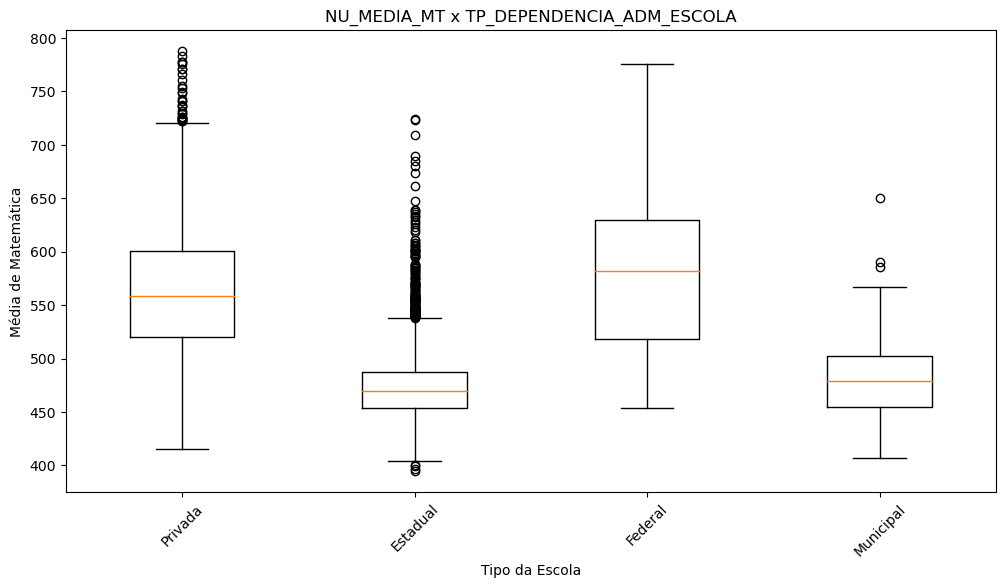

In [9]:
#       NU_MEDIA_MT x TP_DEPENDENCIA_ADM_ESCOLA

plt.figure(figsize=(12, 6))

tipos_escola = {1: 'Federal', 2: 'Estadual', 3: 'Municipal', 4: 'Privada'}

# Extraindo as categorias
porte_escola_categories = dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'].unique()

boxplot_data = [dados_feito[dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'] == category]['NU_MEDIA_MT'] for category in porte_escola_categories]
labels = [tipos_escola[category] for category in porte_escola_categories]

plt.boxplot(boxplot_data, labels=labels)

plt.title('NU_MEDIA_MT x TP_DEPENDENCIA_ADM_ESCOLA')
plt.xlabel('Tipo da Escola')
plt.ylabel('Média de Matemática')
plt.xticks(rotation=45)
plt.show()

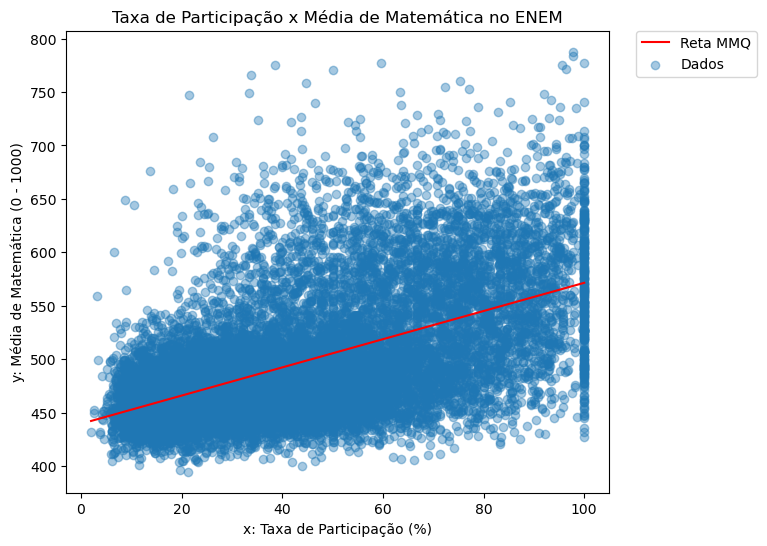

In [10]:
#       NU_MEDIA_MT x NU_TAXA_PARTICIPACAO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_PARTICIPACAO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_PARTICIPACAO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_PARTICIPACAO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_PARTICIPACAO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_PARTICIPACAO'].min(), dados_feito['NU_TAXA_PARTICIPACAO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico:
plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados, alpha=0.4); # dados
plt.xlabel("x: Taxa de Participação (%)")
plt.ylabel("y: Média de Matemática (0 - 1000)")
plt.legend(('Reta MMQ','Dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.title('Taxa de Participação x Média de Matemática no ENEM')
plt.show()

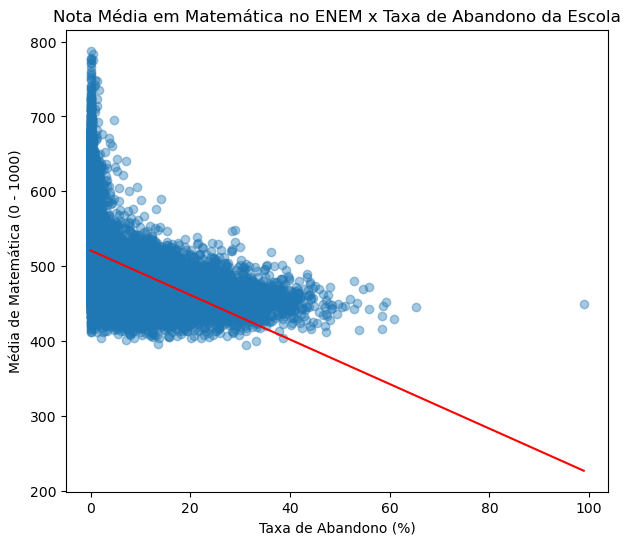

In [11]:
#       NU_MEDIA_MT x NU_TAXA_ABANDONO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_ABANDONO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_ABANDONO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_ABANDONO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_ABANDONO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_ABANDONO'].min(), dados_feito['NU_TAXA_ABANDONO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico:

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados, alpha=0.4); # dados
plt.xlabel("Taxa de Abandono (%)")
plt.ylabel("Média de Matemática (0 - 1000)")
plt.title('Nota Média em Matemática no ENEM x Taxa de Abandono da Escola')
plt.show()


#### EXPLICAÇÃO: 
Podemos observar neste gráfico que é inversamente proporcional a relação entre a taxa de abandono de escola e a nota deste mesmo aluno. Desta maneira, quanto menor a taxa de abandono, maior a nota do ENEM.

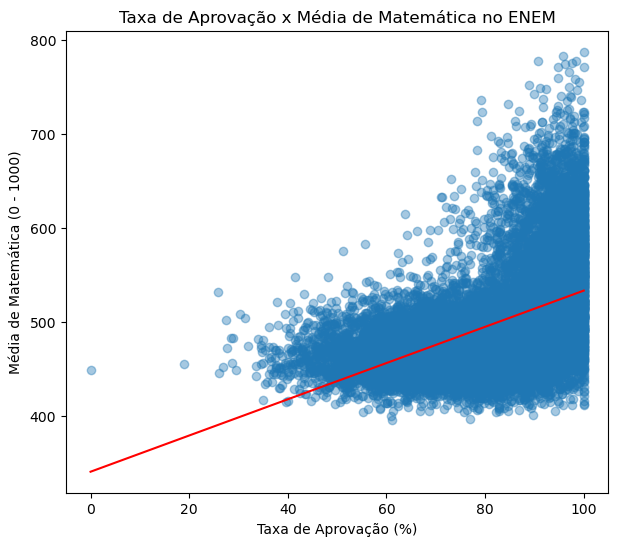

In [12]:
#       NU_MEDIA_MT x NU_TAXA_APROVACAO

#   Método dos mínimos quadrados

# Definindo B1 e B0:

x_dados = dados_feito['NU_TAXA_APROVACAO']
y_dados = dados_feito['NU_MEDIA_MT']

Xb = dados_feito['NU_TAXA_APROVACAO'].mean()
Yb = dados_feito['NU_MEDIA_MT'].mean()

Sxy = 0
for i in range(len(dados_feito)):
    Sxy += (dados_feito['NU_TAXA_APROVACAO'][i]-Xb)*(dados_feito['NU_MEDIA_MT'][i]-Yb)

Sxx = 0
for i in range(len(dados_feito)):
   Sxx += (dados_feito['NU_TAXA_APROVACAO'][i]-Xb)**2

b1 = Sxy/Sxx
b0 = Yb - b1*Xb

# Definindo os vetores x_vec e y_vec:

x_vec = np.linspace(dados_feito['NU_TAXA_APROVACAO'].min(), dados_feito['NU_TAXA_APROVACAO'].max(), 100)
y_vec = b0 + b1*x_vec

# Plotando o gráfico:
plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados, alpha=0.4); # dados
plt.xlabel("Taxa de Aprovação (%)")
plt.ylabel("Média de Matemática (0 - 1000)")
plt.title('Taxa de Aprovação x Média de Matemática no ENEM')
plt.show()

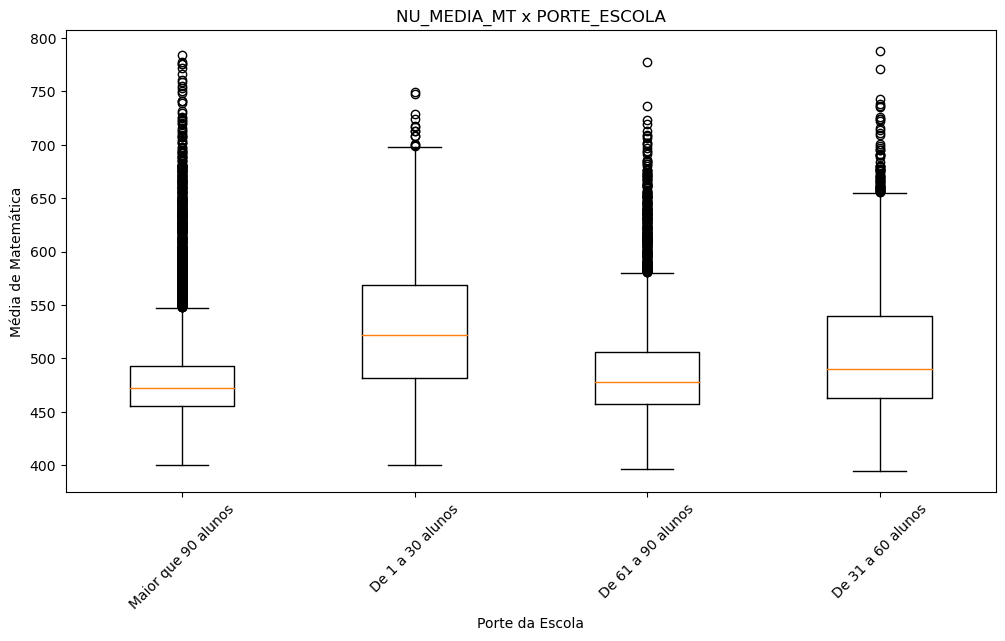

In [13]:
#       NU_MEDIA_MT x PORTE_ESCOLA

plt.figure(figsize=(12, 6))

# Extraindo as categorias
porte_escola_categories = dados_feito['PORTE_ESCOLA'].unique()

boxplot_data = [dados_feito[dados_feito['PORTE_ESCOLA'] == category]['NU_MEDIA_MT'] for category in porte_escola_categories]

plt.boxplot(boxplot_data, labels=porte_escola_categories)

plt.title('NU_MEDIA_MT x PORTE_ESCOLA')
plt.xlabel('Porte da Escola')
plt.ylabel('Média de Matemática')
plt.xticks(rotation=45)
plt.show()

#### EXPLICAÇÃO:

Um fundo de investimentos da Faria Lima está querendo saber de onde vem os melhores prospectos (estudantes que estão ingressando agora na faculdade), para poder realizar campanhas e eventos em lugares onde esses prospectos estejam, para popularizar o banco e despertar a vontade desses prospectos de trabalharem lá futuramente. 
Para isso, o fundo de investimentos precisa de um código que preveja a média da nota de matemática da escola, com base em outras informações, para isso, eles analisarão algumas features:

A primeira a ser analisada foi a TP_DEPENDENCIA_ADM_ESCOLA, que nos diz se é uma escola particular, municipal, estadual ou federal. No gráfico plotado acima, observa-se que escolas estaduais possuem as piores médias de matematica, enquanto as particulares possuem os maiores valores decripantes. Enquanto isso, as federais surpreenderam com a maior mediana e os melhores quartis

A segunda feature escolhida foi a taxa de participação da escola no ENEM, no gráfico podemos observar que quanto maior a taxa de participação, maior a média de matemática no ENEM.

Já a terceira, diz respeito a taxa de abandono da escola, nela podemos observar que quanto maior a taxa de abandono, menor é a média de matemática do ENEM

Agora na quarta e penúltima feature, que condiz com a taxa de aprovação, é compreendido que quanto maior a taxa de aprovação, maior a média de matemática da escola no ENEM.

Ja na quinta e última feature, onde leva-se em conta o porte da escola, nota-se que os 25% piores de cada tipo chegam a ser bem similares, ja o segundo e terceiro quartil (que representa os acima dos 25% piores e abaixo dos 25% melhores) é maior em escolas de 1 a 30 alunos, e diminui a medida que aumenta o porte da escola. Porém as maiores notas vem das escolas com maior porte.

# **Modelos de Predição**

## Treino dos Modelos ##

### Separação da Base de dados 'Treino' e 'Teste' ###

In [14]:
dados_feito.head(5)

,NU_MEDIA_MT,TP_DEPENDENCIA_ADM_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_ABANDONO,NU_TAXA_APROVACAO,PORTE_ESCOLA
0,592.42,4,65.5,0.0,95.5,Maior que 90 alunos
1,467.55,4,50.0,4.7,89.7,De 1 a 30 alunos
2,551.71,4,77.1,0.0,96.3,De 61 a 90 alunos
3,498.91,4,52.2,1.3,91.7,De 61 a 90 alunos
4,570.26,4,60.0,2.3,93.2,De 1 a 30 alunos


In [15]:
categories = dados_feito['TP_DEPENDENCIA_ADM_ESCOLA'].unique()
print(categories)


[4 2 1 3]


In [16]:
porte_escola_categories = {'De 1 a 30 alunos': 1, 'De 31 a 60 alunos': 2, 'De 61 a 90 alunos': 3, 'Maior que 90 alunos': 4}

dados_feito['PORTE_ESCOLA'] = dados_feito['PORTE_ESCOLA'].map(porte_escola_categories)

dados_feito.head(5)

,NU_MEDIA_MT,TP_DEPENDENCIA_ADM_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_ABANDONO,NU_TAXA_APROVACAO,PORTE_ESCOLA
0,592.42,4,65.5,0.0,95.5,4
1,467.55,4,50.0,4.7,89.7,1
2,551.71,4,77.1,0.0,96.3,3
3,498.91,4,52.2,1.3,91.7,3
4,570.26,4,60.0,2.3,93.2,1


In [17]:
X = pd.DataFrame(dados_feito[['TP_DEPENDENCIA_ADM_ESCOLA', 'NU_TAXA_PARTICIPACAO', 'NU_TAXA_ABANDONO', 'NU_TAXA_APROVACAO', 'PORTE_ESCOLA']])
y = pd.DataFrame(dados_feito['NU_MEDIA_MT'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train.head(10)

,TP_DEPENDENCIA_ADM_ESCOLA,NU_TAXA_PARTICIPACAO,NU_TAXA_ABANDONO,NU_TAXA_APROVACAO,PORTE_ESCOLA
1077,2,59.3,5.3,85.5,1
8187,2,24.3,15.9,68.6,4
15955,2,11.7,15.0,60.7,2
13288,2,28.8,0.3,77.0,4
12670,4,63.5,0.0,100.0,3
13273,2,12.8,9.4,57.6,4
1183,2,39.8,23.3,63.9,4
7144,2,40.6,8.6,82.3,4
9534,2,25.2,4.3,82.3,4
3060,2,39.7,17.9,81.3,2


### Modelo da 'Random Forest' ###

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/var/folders/x9/_d9131zd0kv_7kqrvjfvld9m0000gn/T/ipykernel_42664/650042473.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

RMSE: 14.670317162786315
R2: 0.928663319608884


/Users/viniciusgrecco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/viniciusgrecco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


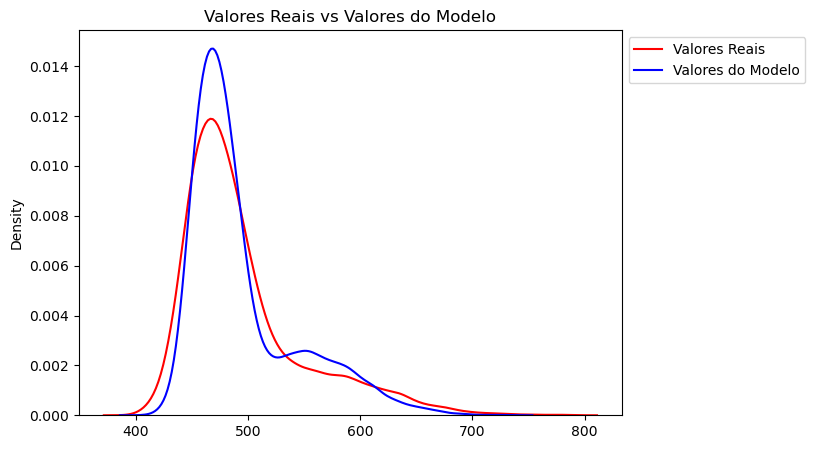

In [20]:
y_pred_RF = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_RF)
print(f"RMSE: {mse**0.5}")

r2 = r2_score(y_train, y_pred_RF)
print(f"R2: {r2}")

# Gráfico das predições de pelo Random Forest vs Valores Reais

plt.figure(figsize=(7, 5))

ax = sns.distplot(y, hist=False, color="r", label="Valores Reais")
sns.distplot(y_pred_RF, hist=False, color="b", label="Valores do Modelo" , ax=ax)


plt.title('Valores Reais vs Valores do Modelo')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.close()

### Modelo da 'Regressão Linear Múltipla' ###

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_reg = model.predict(X_train)
y_pred_reg

array([[478.14305977],
       [468.65775138],
       [450.2748991 ],
       ...,
       [488.29346061],
       [542.55924393],
       [479.70564898]])

RMSE: 37.274716732933285
R2: 0.5394650513672536


/Users/viniciusgrecco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/viniciusgrecco/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


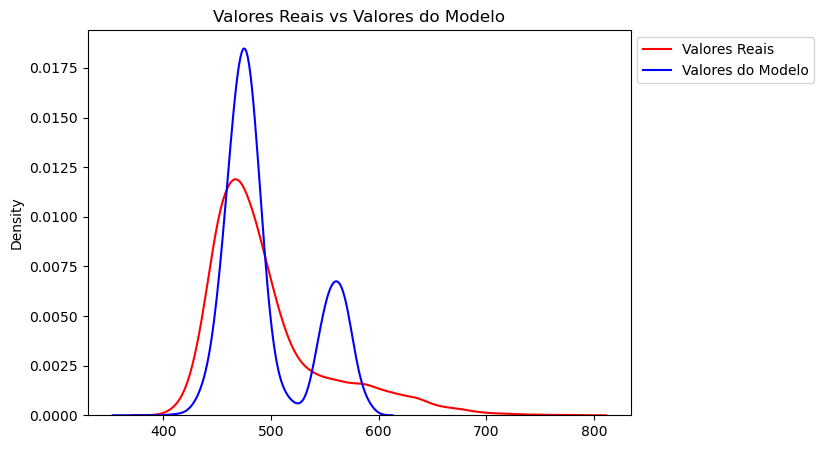

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_reg = model.predict(X_train)
y_pred_reg

rmse = mean_squared_error(y_train, y_pred_reg)
r2 = r2_score(y_train, y_pred_reg)

print(f'RMSE: {rmse**0.5}')
print(f'R2: {r2}')

# Gráfico das predições de pela Regressão Linear vs Valores Reais

plt.figure(figsize=(7, 5))


ax = sns.distplot(y, hist=False, color="r", label="Valores Reais")
sns.distplot(y_pred_reg, hist=False, color="b", label="Valores do Modelo" , ax=ax)


plt.title('Valores Reais vs Valores do Modelo')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


plt.show()
plt.close()

### Modelo dos K-Vizinhos Mais Próximos ###

In [24]:
lista_r2 = []
lista_mse = []
ks = []

for i in range(1, 100):
    k = i
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_train)

    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    lista_mse.append(mse)
    lista_r2.append(r2)
    ks.append(k)

    # print(f'K-Vizinho nº{k}', end='')
    # print(f'Mean Squared Error: {mse**0.5}', end='')
    # print(f'R2 = {r2}', end='')

plt.figure(figsize=(7, 5))

print(f'R2 = {lista_r2[-1]}')
print(f'RMSE = {lista_mse[-1]**0.5}')

sns.kdeplot(y_train, color="red", label="Valores Reais")
sns.kdeplot(y_pred, color="blue", label="Valores do Modelo")

plt.figure(figsize=(10, 6))
plt.plot(ks, lista_mse, marker='o')
plt.title('R-squared Value for Different k in KNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('R-squared Value')
plt.show()
plt.close()




R2 = 0.531217776445092
RMSE = 37.60699414846025


ValueError: If using all scalar values, you must pass an index

<Figure size 700x500 with 0 Axes>

K = 13

## Teste dos Modelos ##

### Teste Modelo dos "K-Vizinhos Mais Próximos" ###

In [ ]:
r2_lista = []
mse_lista = []

for testes in range(10):

    # Embaralhando os índices

    shuffled_indices = X_test.sample(frac=1, random_state=69).index

    # Mudando os índices dos DataFrames 

    shuffled_x_test = X_test.loc[shuffled_indices].reset_index(drop=True)
    shuffled_y_test = y_test.loc[shuffled_indices].reset_index(drop=True)


    lista = []
    ks = []

    for i in range(1, 14):
        k = i
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_test, y_test)

        y_pred_knb = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred_knb)
        r2 = r2_score(y_test, y_pred_knb)
        lista.append(r2)
        ks.append(k)

    r2_lista.append(lista)
    mse_lista.append(mse)


print(f'A média dos R2 é {(np.mean(r2_lista))}')
print(f'A média dos RMSE é {(np.mean(mse_lista)**0.5)}')


A média dos R2 é 0.6800808906395253
A média dos RMSE é 34.46922705024104


### Teste Modelo "Regressão Linear" ###

In [ ]:
lista_rmse = []
lista_r2 = []
for n in range(10):
    shuffled_indices = X_test.sample(frac=1, random_state=42).index

    shuffled_x_test = X_test.loc[shuffled_indices].reset_index(drop=True)
    shuffled_y_test = y_test.loc[shuffled_indices].reset_index(drop=True)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_reg = model.predict(X_train)

    rmse = mean_squared_error(y_train, y_pred_reg)
    r2 = r2_score(y_train, y_pred_reg)
    lista_rmse.append(rmse)
    lista_r2.append(r2)

print(f'O RMSE = {np.mean(lista_rmse)**0.5}')

print(f'O R2 = {np.mean(lista_r2)}')


O RMSE = 37.274716732933285
O R2 = 0.5394650513672536


### Teste Modelo "Random Forest" ###

In [ ]:
r2_list = []
rms_list = []

for i in range(10):

    shuffled_indices = X_test.sample(frac=1, random_state=42).index

    shuffled_x_test = X_test.loc[shuffled_indices].reset_index(drop=True)
    shuffled_y_test = y_test.loc[shuffled_indices].reset_index(drop=True)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred_RF = model.predict(X_train)

    mse = mean_squared_error(y_train, y_pred_RF)
    r2 = r2_score(y_train, y_pred_RF)
    
    r2_list.append(r2)
    rms_list.append(mse)

print(f"RMSE: {(np.mean(rms_list)**0.5)}")
print(f"R2: {(np.mean(r2_list))}")

c:\Users\aerac\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\aerac\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\aerac\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\aerac\anaconda3\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

RMSE: 14.670317162786315
R2: 0.9286633196088839


C:\Users\aerac\AppData\Local\Temp\ipykernel_8636\3247868790.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_knb, hist=False, color="g", label="K-Vizinho mais próximo")
C:\Users\aerac\AppData\Local\Temp\ipykernel_8636\3247868790.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

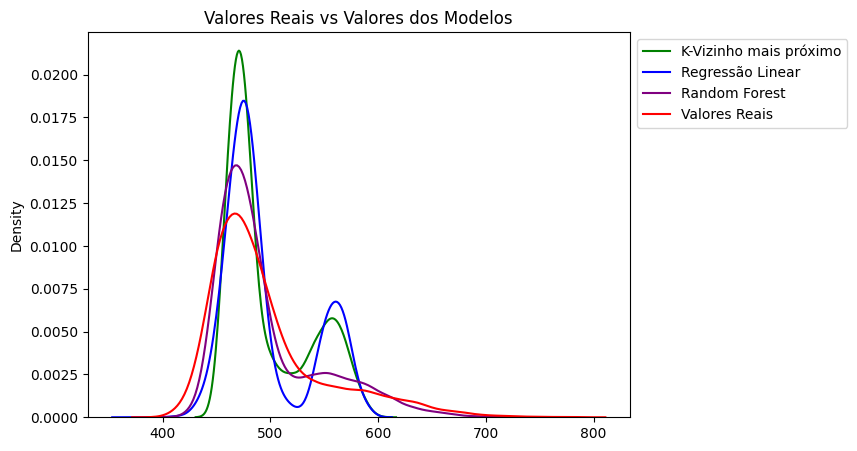

In [ ]:
# Gráficos de todos os modelos vs Valores Reais

plt.figure(figsize=(7, 5))

sns.distplot(y_pred_knb, hist=False, color="g", label="K-Vizinho mais próximo")
sns.distplot(y_pred_reg, hist=False, color="b", label="Regressão Linear")
sns.distplot(y_pred_RF, hist=False, color="purple", label="Random Forest")

ax = sns.distplot(y, hist=False, color="r", label="Valores Reais")

plt.title('Valores Reais vs Valores dos Modelos')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
plt.close()


Com a validação dos modelos preditivos, pode-se observar que ao mencionar os melhores modelos, do melhor ao pior, para o nosso problema, que é o modo que o tipo de escola influencia na nota de matemática no ENEM, seriam o Random Forest, K-Vizinhos e Regressão Linear.

O Random Forest é um algoritmo de aprendizado de máquina que constrói várias árvores de decisão, cada uma treinada em uma amostra aleatória dos dados. Durante a previsão, as árvores combinam suas previsões, resultando em uma previsão mais robusta. A aleatoriedade na construção das árvores ajuda a evitar o overfitting, e o algoritmo fornece informações sobre a importância das características. É amplamente utilizado para classificação e regressão devido à sua eficácia e versatilidade.
Segundo os testes realizados em nosso projeto, o modelo Random Forest teve um resultado impressionante, com um R2 incrivelmente alto e uma taxa de erro (RMSE) baixo tanto no teste quanto no treino. Dessa forma, ele não se encaixa como overfitting nem como underfitting, sendo um modelo de precisão muito alta.

O modelo de k-vizinhos é um algoritmo de aprendizado de máquina usado para classificação e regressão. Funciona atribuindo uma classificação ou valor de acordo com a maioria dos k vizinhos mais próximos em um espaço de características. Durante a previsão, o modelo calcula a distância entre um ponto de dados de teste e os pontos de dados de treinamento, identifica os k vizinhos mais próximos e determina a classe (para classificação) ou valor médio (para regressão) com base na contribuição desses vizinhos. O parâmetro k controla o número de vizinhos considerados. O modelo k-vizinhos é intuitivo, mas pode ser sensível a outliers e requer um ajuste adequado do parâmetro k para um desempenho ideal.
Em nosso trabalho, o modelo K-Vizinhos teve um resultado muito semelhante ao modelo de Regressão Linear. A taxa de erro foi alta, com mais de 50% de erro. Porém, o erro em si é incrivelmente baixo, com uma margem de aproximadamente 38. Dessa forma, nenhum dos dois se encaixa como overfitting nem como underfitting, pois no fim das contas sua precisão também é alta. A única diferença é que o modelo de Random Forest apresentou um resultado muito melhor que os outros dois modelos

A Regressão Linear Múltipla é um modelo de aprendizado de máquina usado para prever uma variável dependente com base em duas ou mais variáveis independentes. O modelo assume uma relação linear entre as variáveis, onde os coeficientes são ajustados para minimizar a diferença entre as previsões e os valores reais. Durante o treinamento, os coeficientes são calculados usando técnicas como o método dos mínimos quadrados. Durante a previsão, o modelo utiliza esses coeficientes para estimar a variável dependente com base nas variáveis independentes fornecidas. A Regressão Linear Múltipla é interpretável e fácil de implementar, mas sua eficácia depende da adequação à suposição linear e da presença de multicolinearidade entre as variáveis independentes. A interpretação dos coeficientes é crucial para entender a contribuição relativa de cada variável na previsão. Em nosso projeto, este modelo foi o menos eficiente, muito provavelmente por haver uma multicolinearidade entre as variaveis, pois como vimos, há um padrão similar entre os tipos de escolas que tiram as maiores notas e as que tiram as menores notas

# Conclusão
A análise revelou nuances interessantes, destacando a notável influência do tipo de escola, taxa de participação, abandono, aprovação e porte na performance dos alunos. O modelo Random Forest emergiu como líder, destacando-se por sua adaptação a complexidades nos dados. Em contraste, o K-Vizinhos e a Regressão Linear Múltipla exibiram desempenhos menos robustos, com a última sendo a menos eficaz, possivelmente devido à multicolinearidade. Essas descobertas não apenas fornecem insights valiosos para previsões futuras, mas também delineiam estratégias direcionadas para campanhas de recrutamento do fundo de investimentos da Faria Lima, otimizando a identificação de talentos promissores de acordo com as características da escola.

# Referências Bibliográficas